This notebook is for 
- visualizing regional curving fitting results (without vaccination)
- compile regional results to a single dataframe

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.backends.backend_pdf

In [2]:
''' set up dates '''

from datetime import datetime, timedelta
import matplotlib.dates as mdates

base = datetime(2020, 1, 1)
start_data=0
end_data=558

# days since 1/1/2020
arr = np.array([base + timedelta(days=int(i)) for i in range(start_data,end_data+1)])

In [8]:
data=pd.read_csv("prevalance_712_cumcase.csv")

# sim data from grid search
sim=pd.read_csv("~/scratch/run_sim/fit_data_march30.csv")
col={str(i):i for i in np.arange(451)}
sim.rename(columns=col,inplace=True)

In [3]:
''' obtain case data, between start and end date, for region r, accounting for offset in sim'''
def make_data(r,start,end,offset):
    data_r=[]
    row=data[data.location==r]
    for i in range(int(start),int(end)+1):
        data_r.append(row[str(int(i))].item())
    data_r=np.array(data_r)*10**6-offset
    #print('offset',offset)
    return data_r

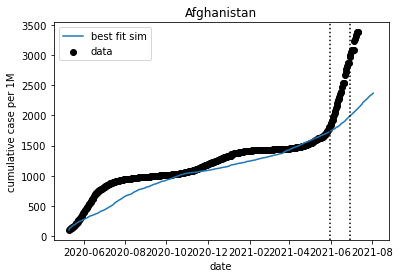

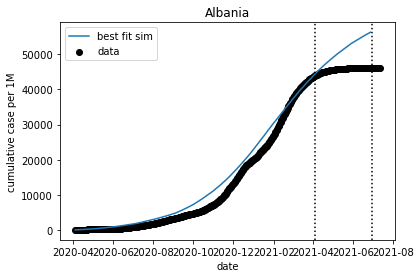

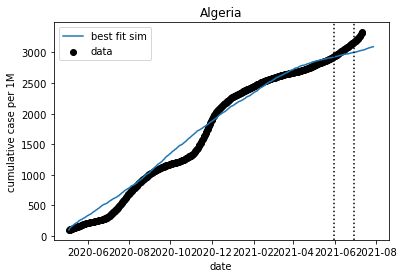

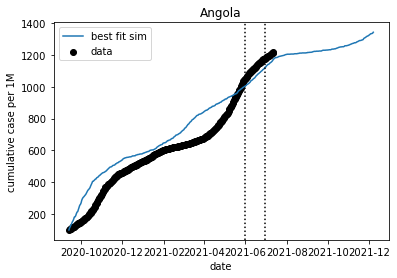

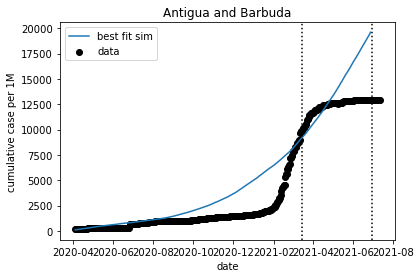

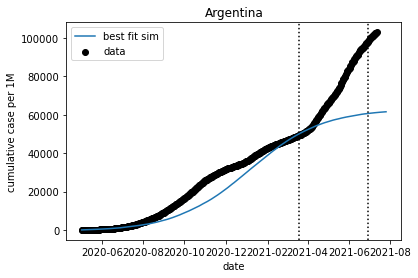

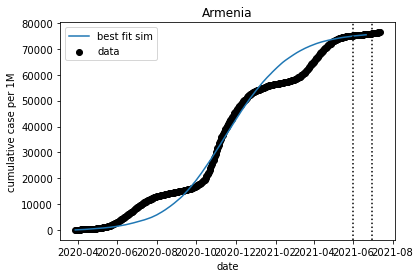

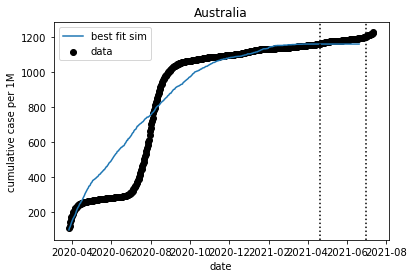

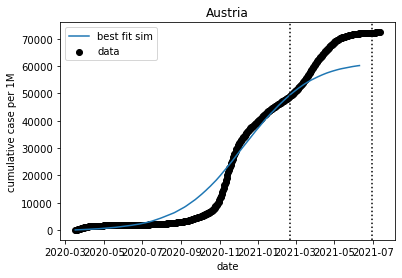

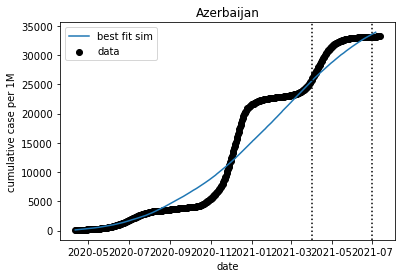

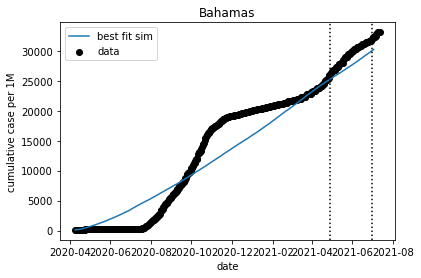

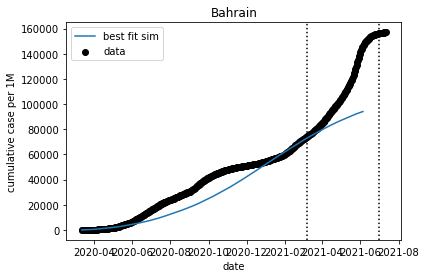

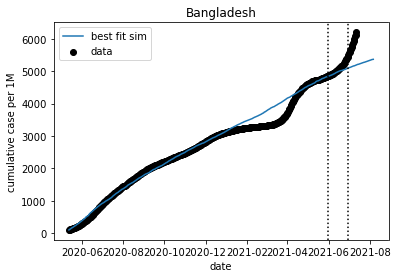

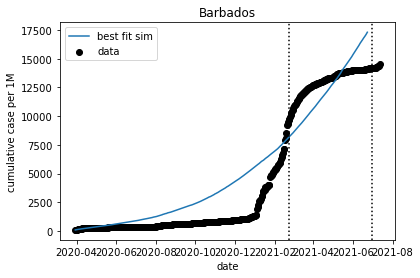

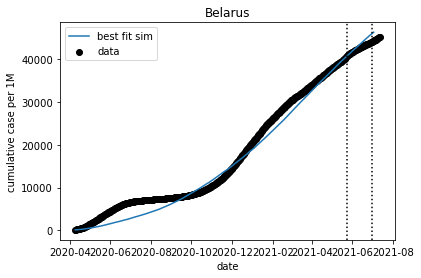

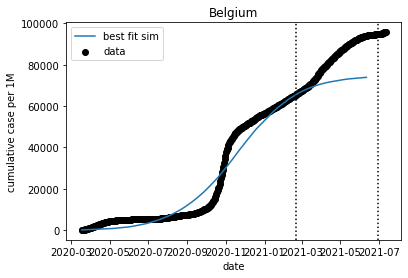

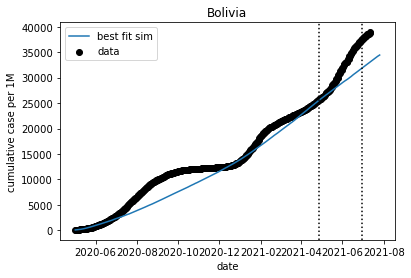

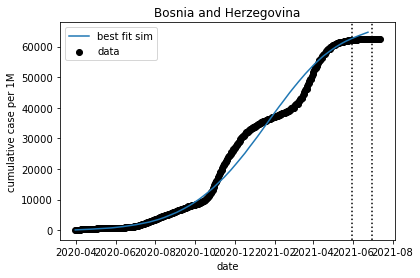

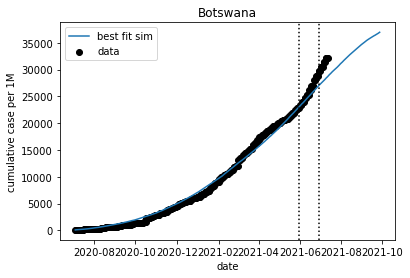

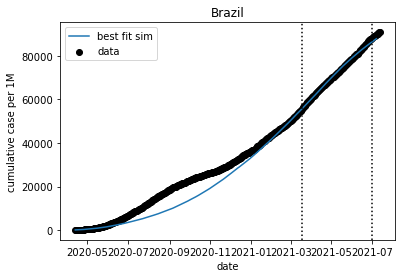

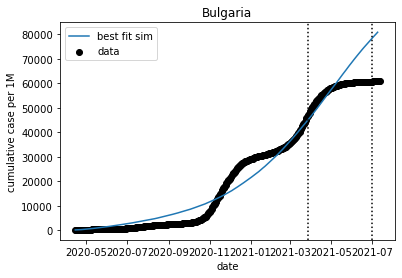

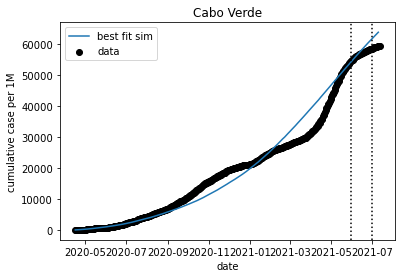

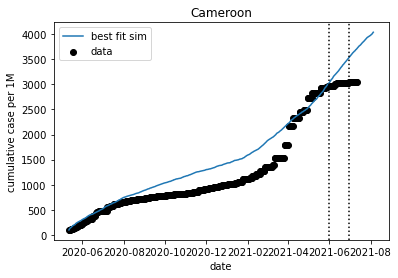

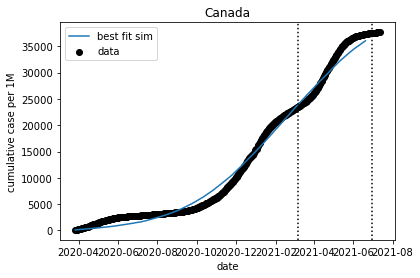

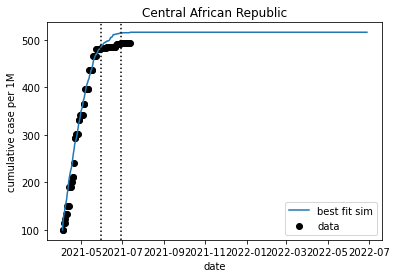

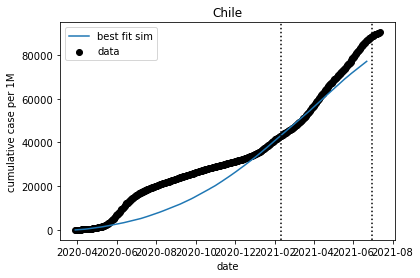

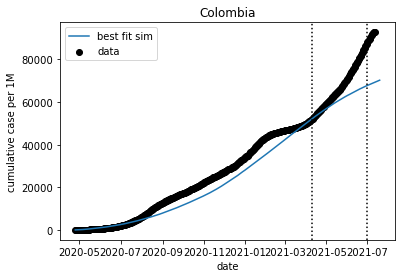

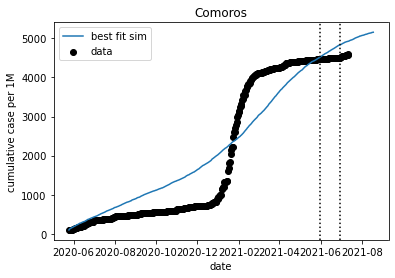

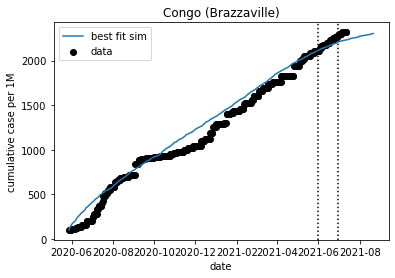

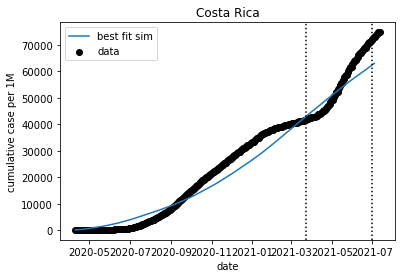

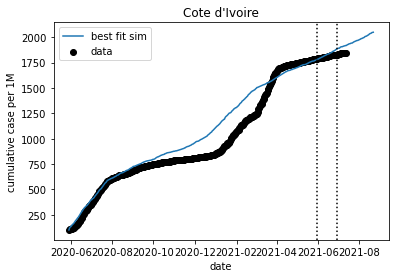

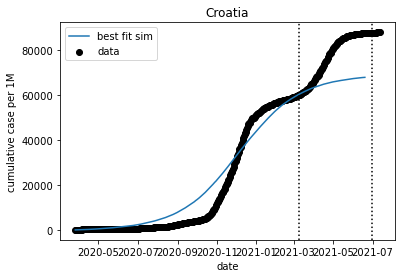

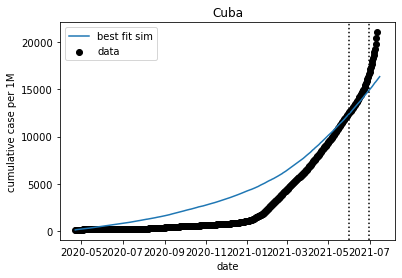

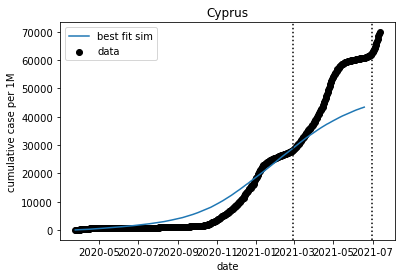

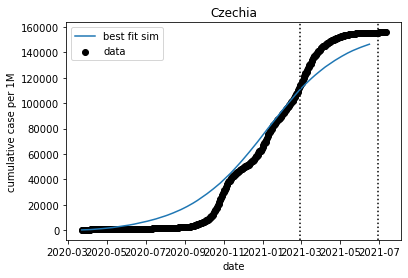

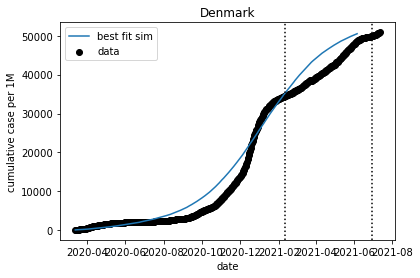

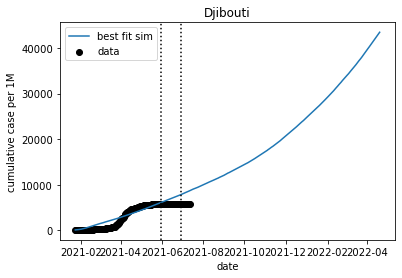

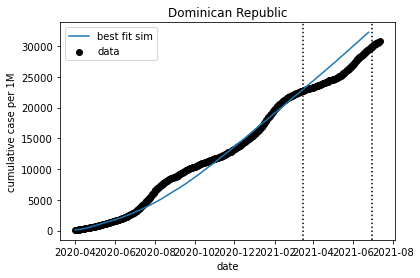

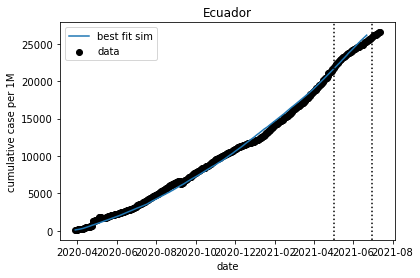

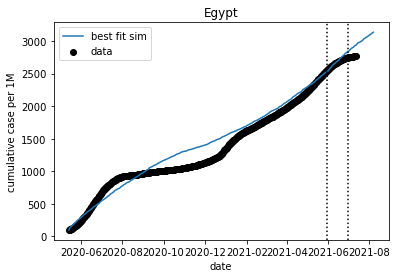

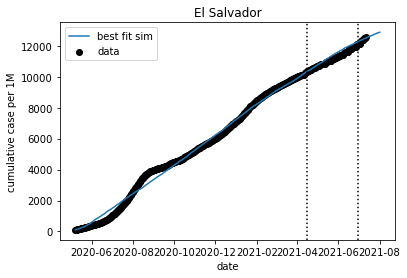

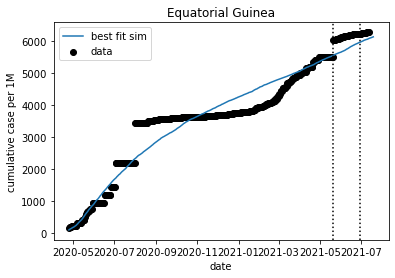

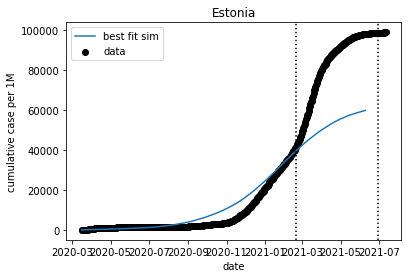

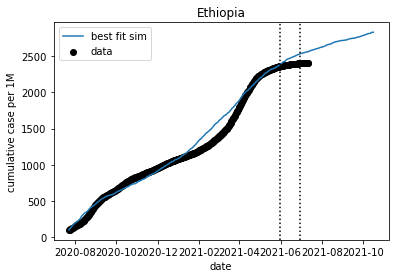

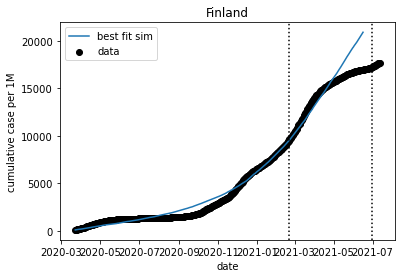

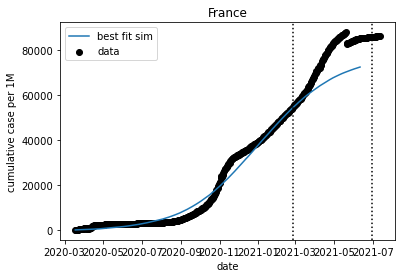

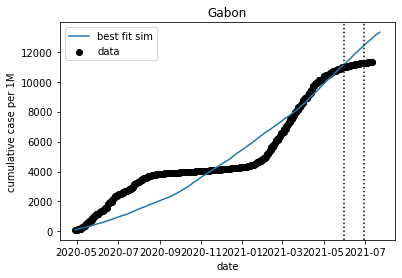

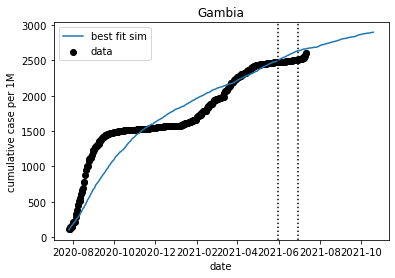

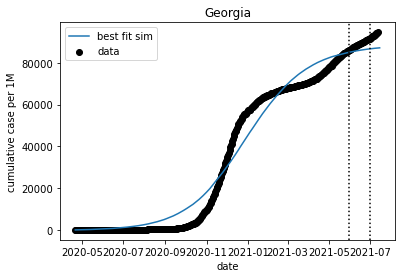

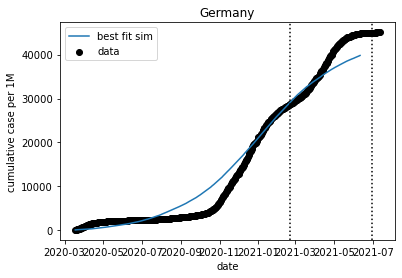

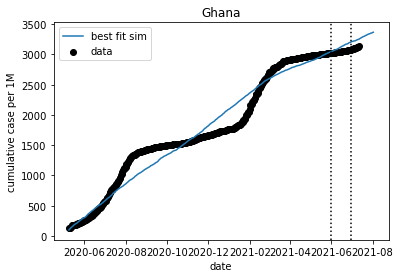

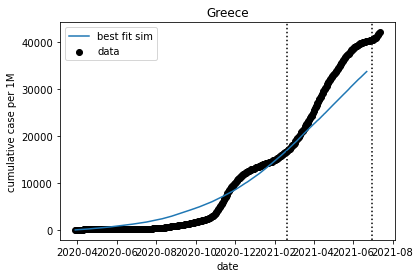

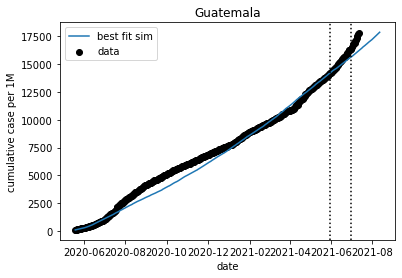

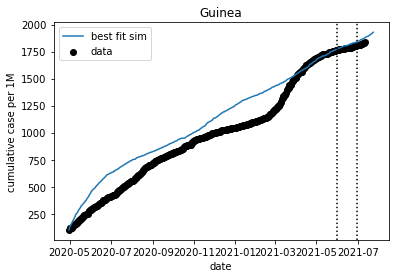

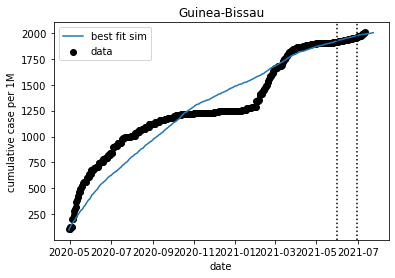

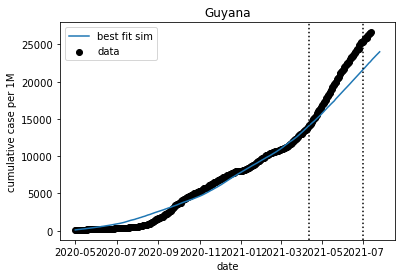

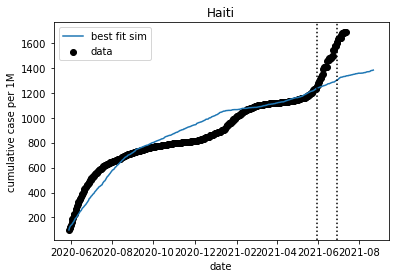

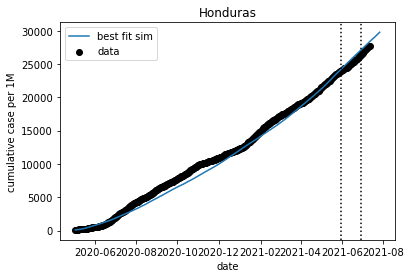

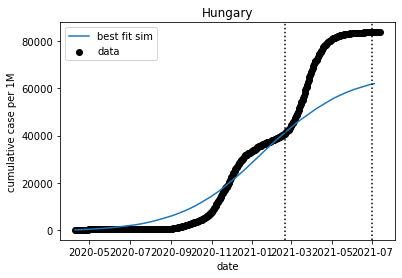

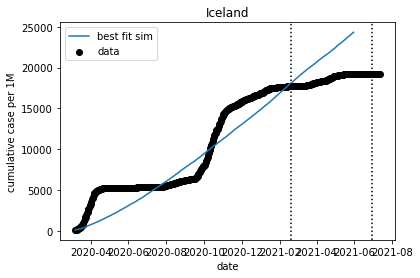

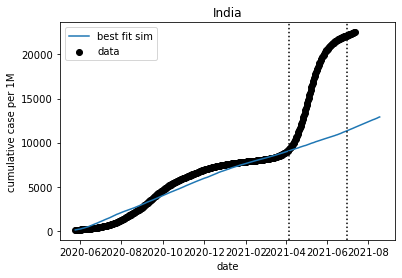

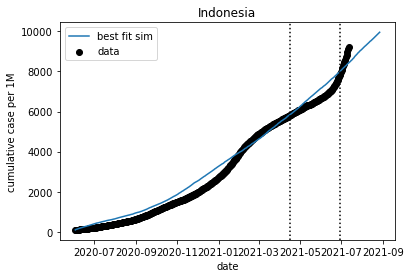

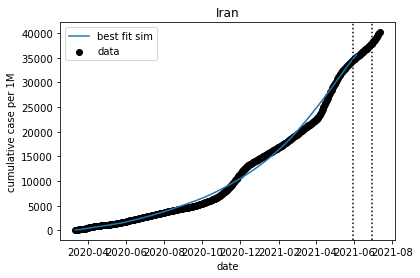

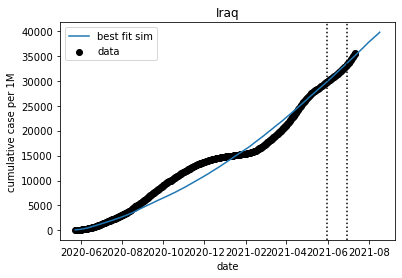

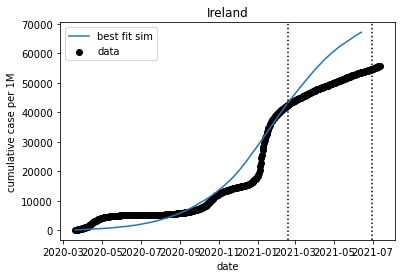

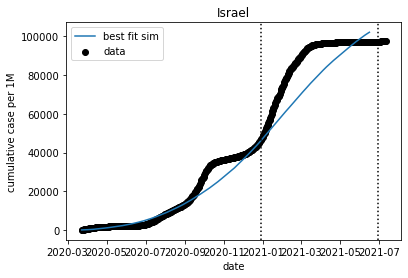

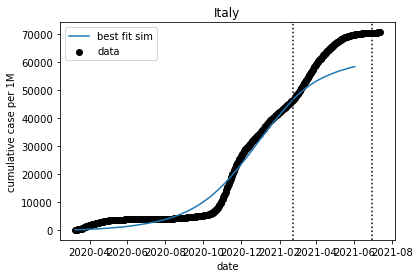

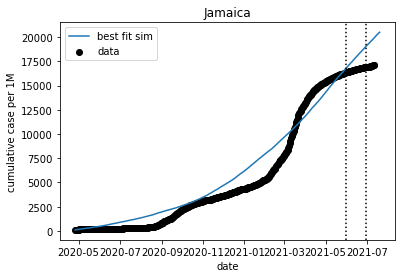

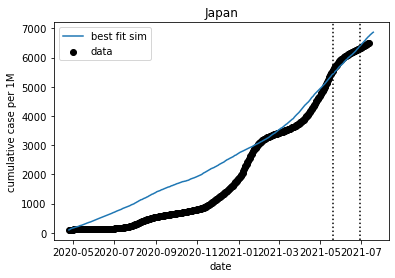

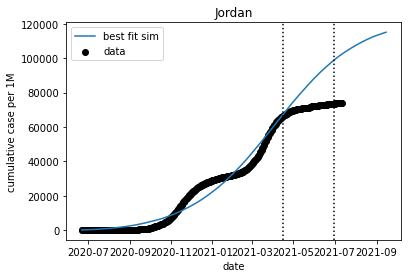

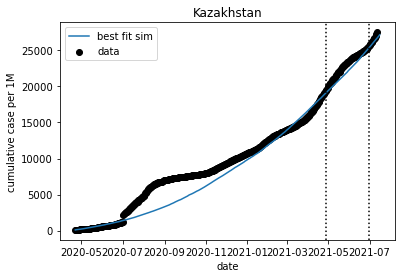

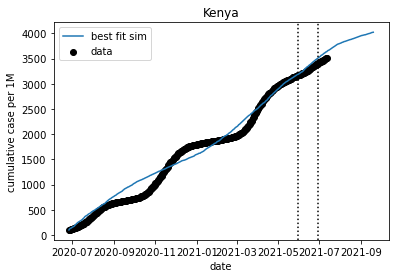

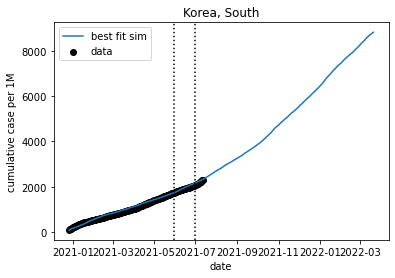

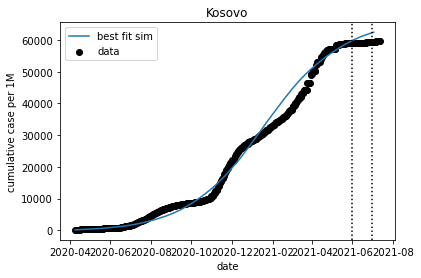

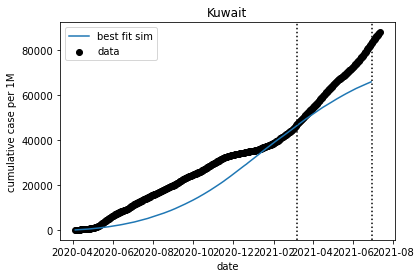

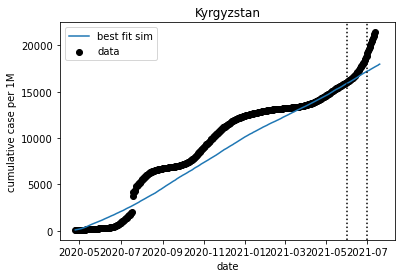

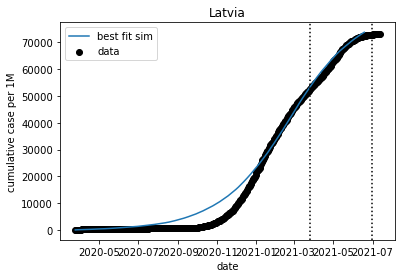

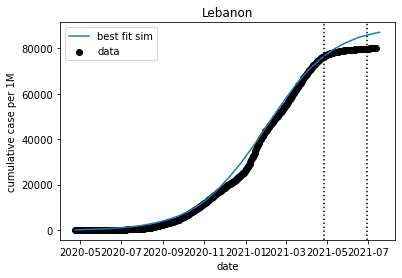

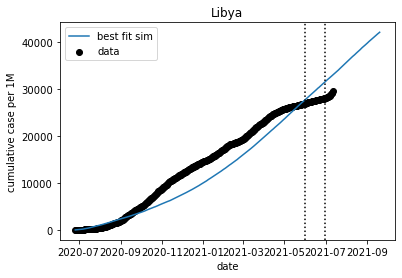

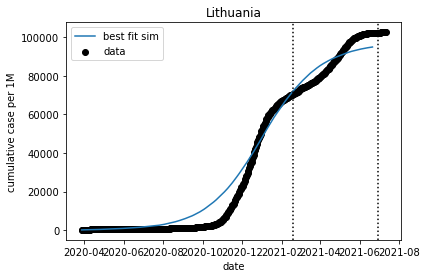

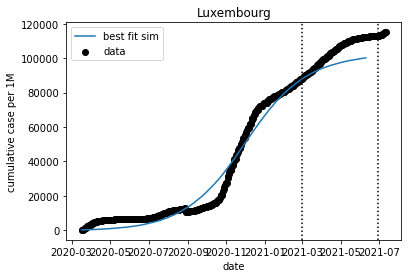

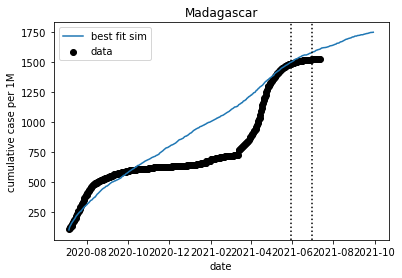

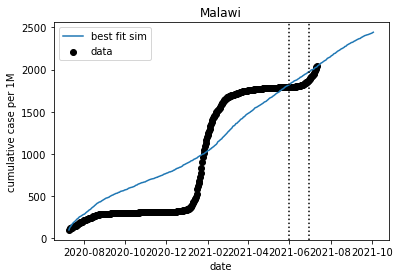

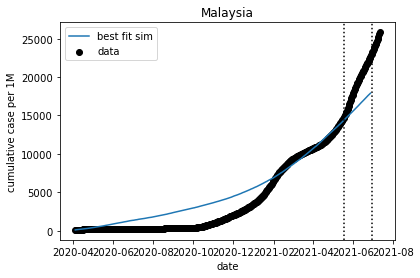

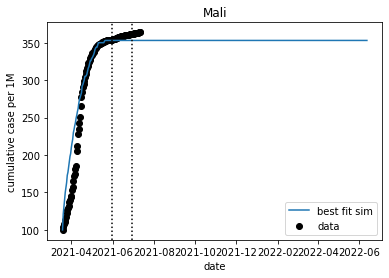

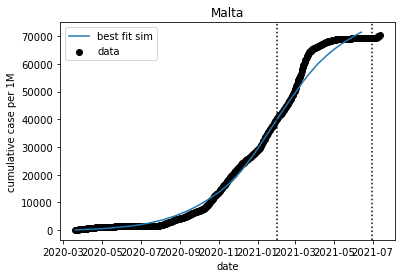

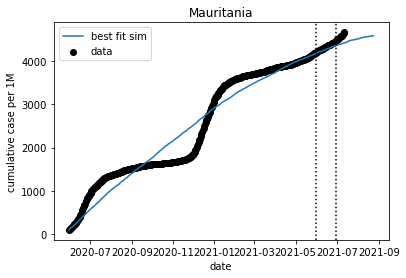

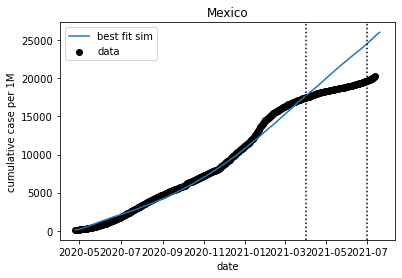

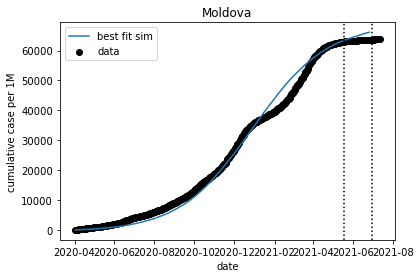

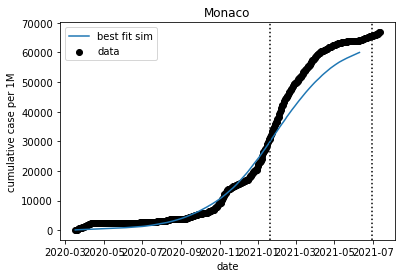

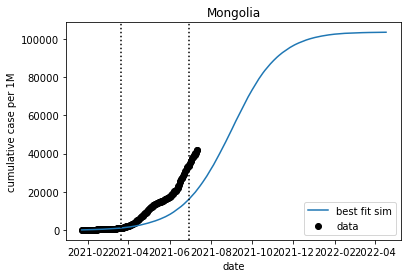

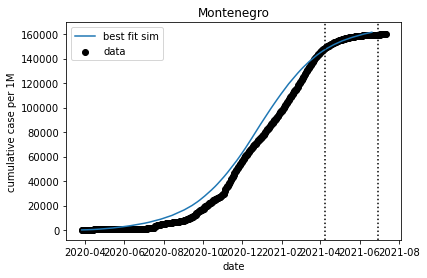

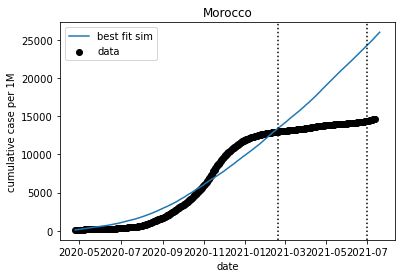

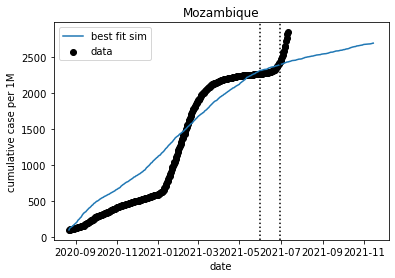

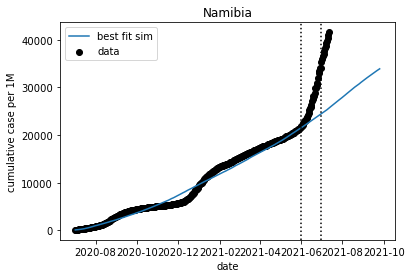

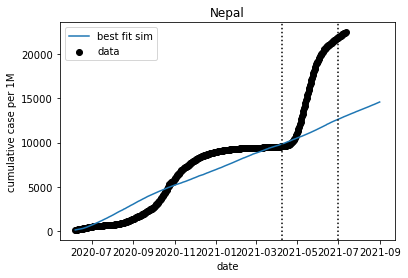

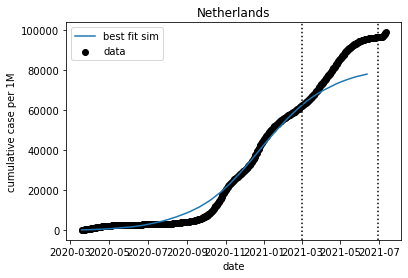

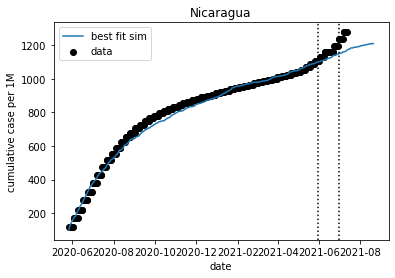

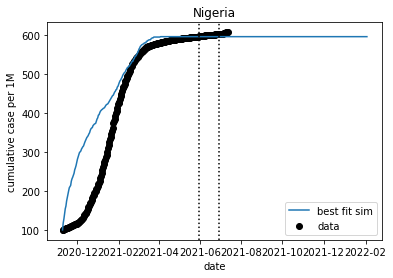

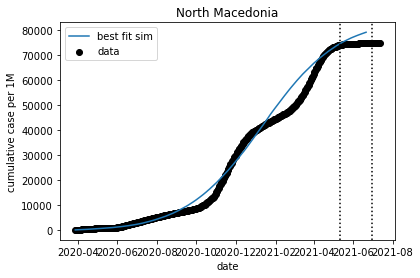

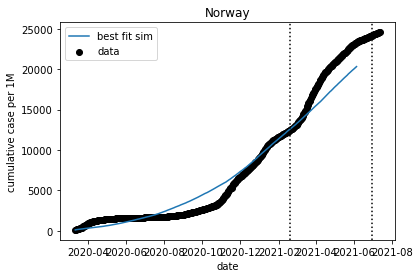

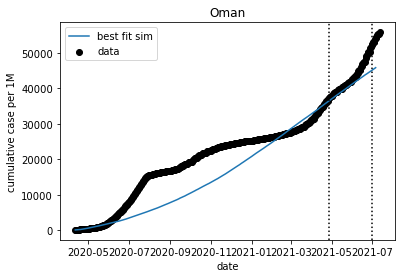

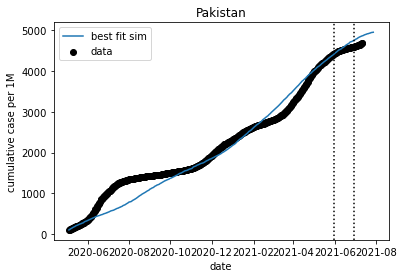

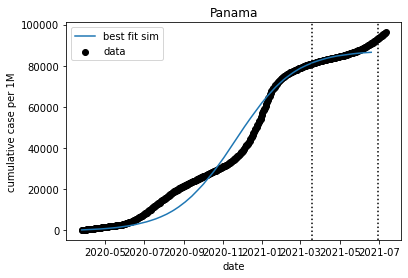

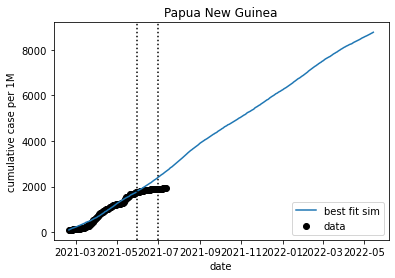

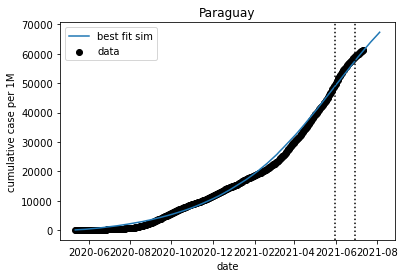

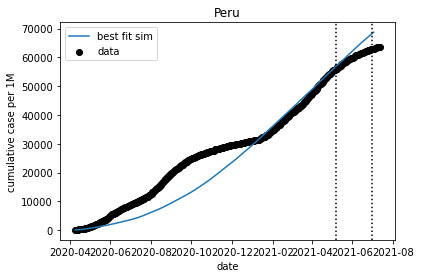

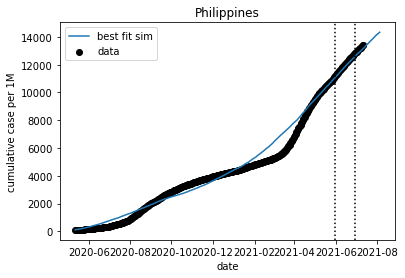

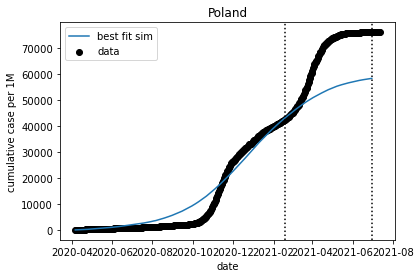

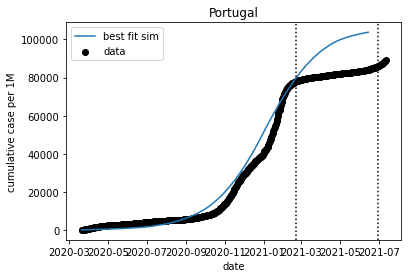

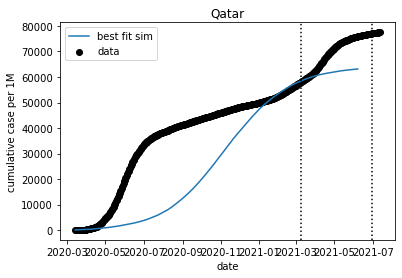

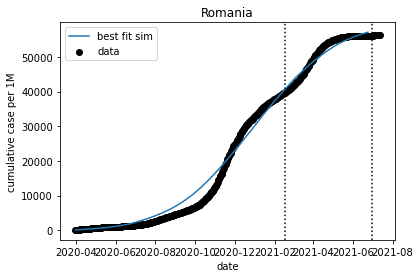

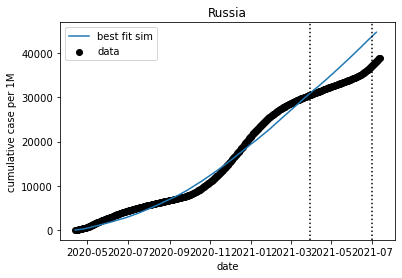

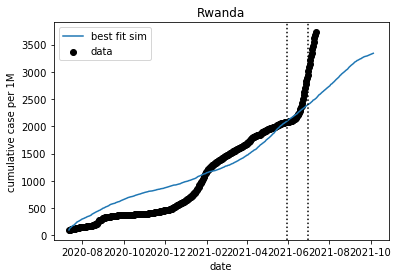

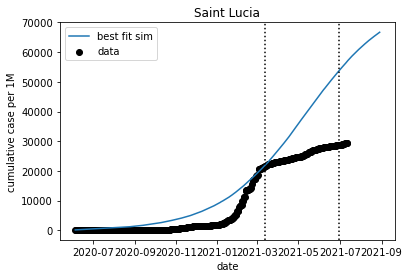

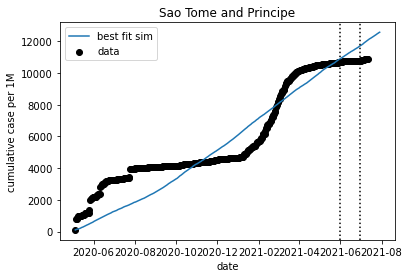

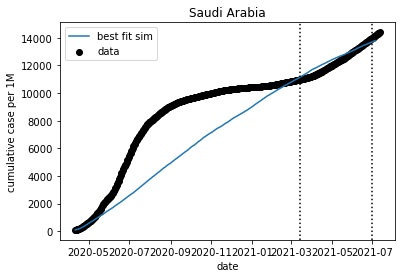

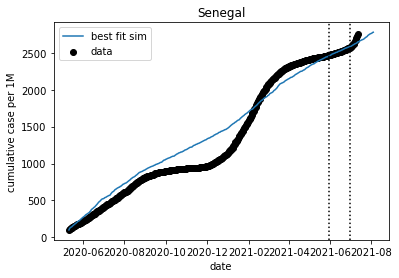

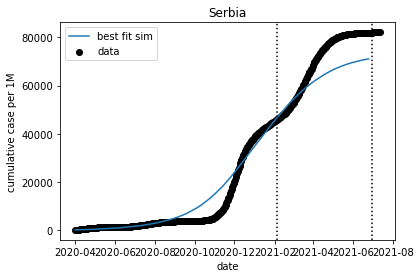

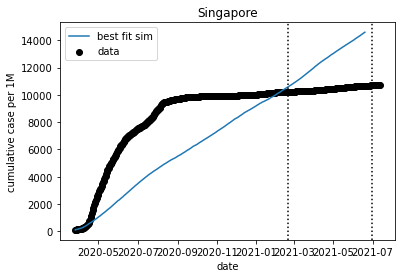

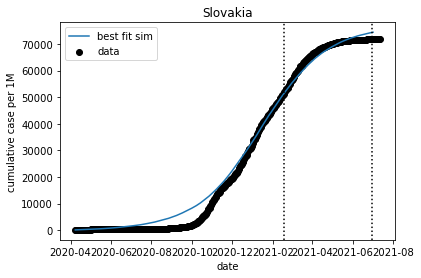

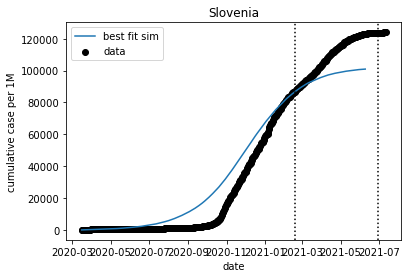

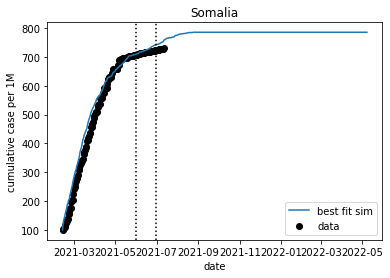

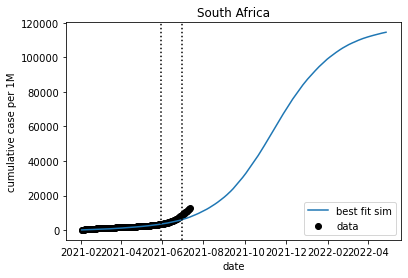

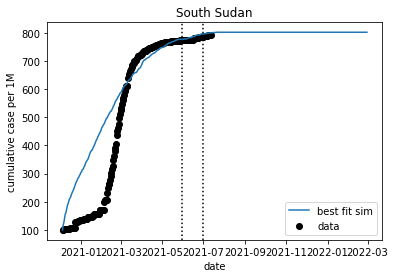

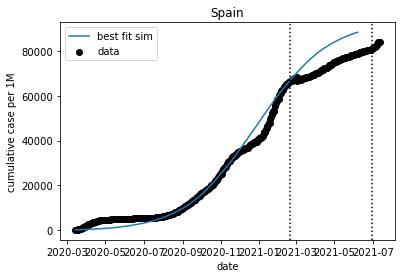

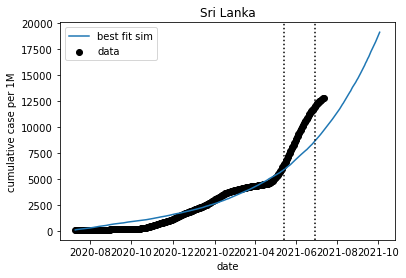

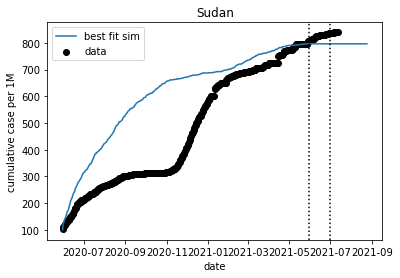

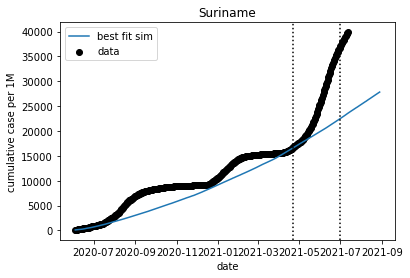

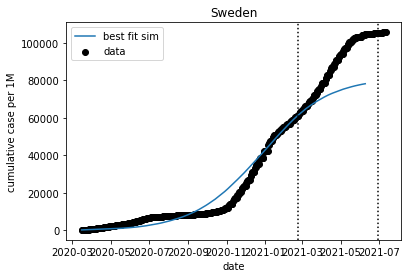

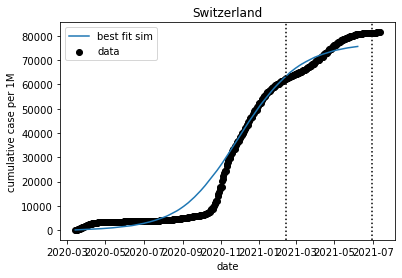

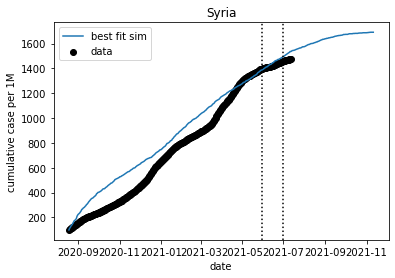

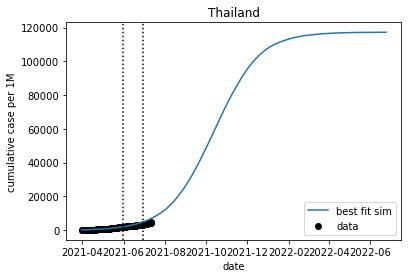

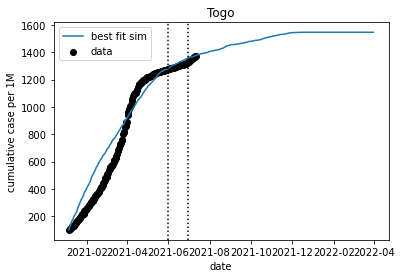

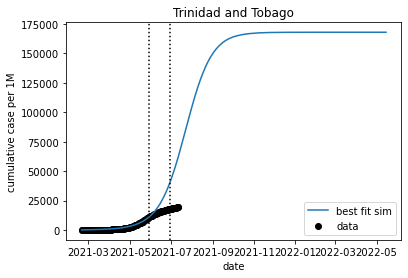

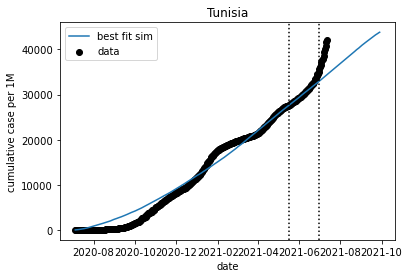

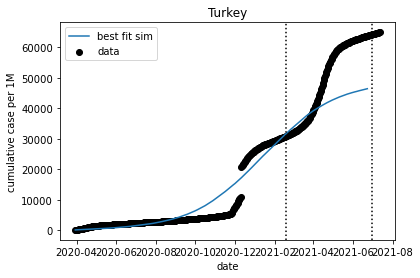

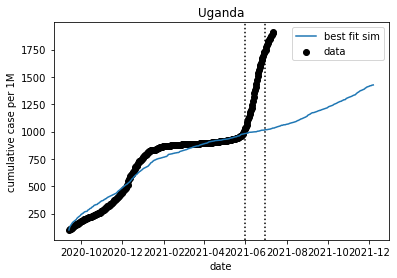

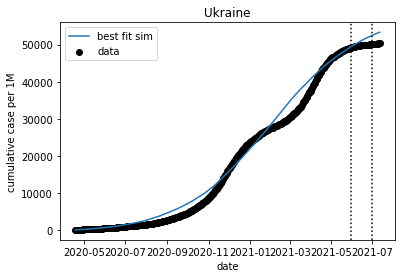

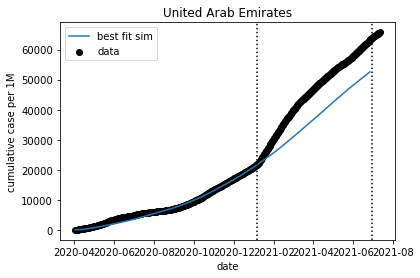

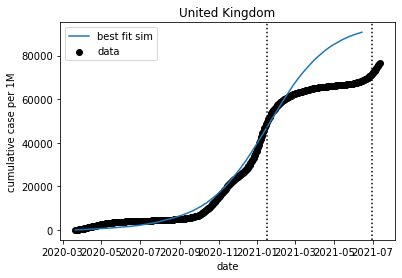

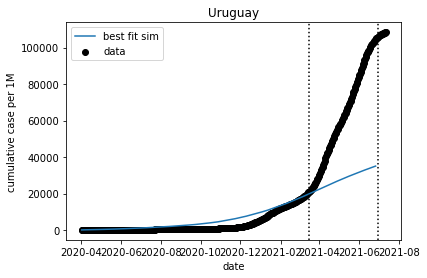

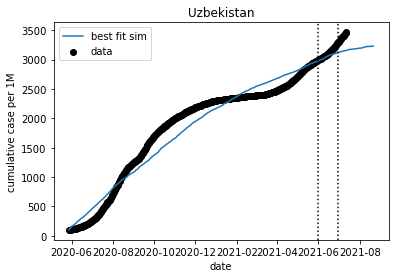

KeyboardInterrupt: 

In [6]:
# dataframe to save fitting results
fits=pd.read_csv("fitting_info_aug3.csv")

# if want to save to pdf
#pdf = matplotlib.backends.backend_pdf.PdfPages("curve_fitting_output_531_before_vaccine.pdf")

for i in range(197):
    
    # read in reginal fit results
    with open('data/fit_output_83/fit_'+str(i)+'.pkl','rb') as f:
        result=pickle.load(f)
        
    # record parameter fits to fits dataframe
    for k in result:    
        fits.loc[i,k]=result[k]
    min_row=sim.loc[result['min_sim_number']]
    r=result['location']
    start=int(fits.loc[i,'start'])
    end=int(fits.loc[i,'end'])
    offset=fits.loc[i,'offset']
    
    fig, axes = plt.subplots(figsize=(6,4))
    
    end_data=558
    # data
    cases=make_data(r,start,end_data,offset)
    
    days=arr[start:end_data+1]
    axes.scatter(days,cases,color='black',label='data')  
    extra= 451-(end-start) # extra from sim
    days= np.array([base + timedelta(days=int(i)) for i in range(start,end+extra)])
    axes.plot(days,min_row[5:len(days)+5].to_numpy(),label='best fit sim')
    axes.axvline(x=base + timedelta(days=end),ls=':',color='black')
    axes.axvline(x=base + timedelta(days=546),ls=':',color='black')
    axes.xaxis.set_major_locator(mdates.MonthLocator(bymonth=None, bymonthday=1, interval=2, tz=None))
    axes.set_title(result['location'])
    axes.set_xlabel('date')
    axes.set_ylabel('cumulative case per 1M')
    axes.legend()
    
    # saving individaul plot to pdf
    #pdf.savefig(fig)
    plt.show()
# closing pdf 
#pdf.close()

In [7]:
fits

,location,start,end,offset,actual_pop_scale,min_sim_number,min_rmse,cum_case_in_1M,min_rmse_fraction,group_size,gamma,gamma_M,S2A
0,Afghanistan,130.0,516.0,0.0,38.928341,28313.0,44.740772,1817.724521,0.024614,50.0,0.5,0.010000,0.012588
1,Albania,94.0,459.0,0.0,2.877800,13816.0,454.066786,43847.035930,0.010356,15.0,0.5,0.990000,0.008471
2,Algeria,124.0,516.0,0.0,43.851043,10013.0,28.316270,2935.506004,0.009646,20.0,0.5,0.881111,0.007647
3,Angola,256.0,516.0,0.0,32.866268,28201.0,26.330886,1045.631345,0.025182,20.0,0.3,0.010000,0.012588
4,Antigua and Barbuda,94.0,440.0,0.0,0.097928,28504.0,522.644406,9833.755412,0.053148,15.0,0.3,0.118889,0.012588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,US.Virginia,89.0,410.0,0.0,8.535519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,US.Washington,76.0,409.0,0.0,7.614893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,US.West Virginia,92.0,395.0,0.0,1.792147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,US.Wisconsin,85.0,408.0,0.0,5.822434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# save parameters 
fits['global_day']=fits['start'] 
fits.to_csv("curve_fitting_results_83_before_vaccine.csv",index=False)